In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Malaquias_1 = "The burden of the word of the LORD to Israel by Malachi.I have loved you, said the LORD. Yet you say, Wherein have you loved us? Was not Esau Jacob' brother? said the LORD: yet I loved Jacob,And I hated Esau, and laid his mountains and his heritage waste for the dragons of the wilderness.Whereas Edom said, We are impoverished, but we will return and build the desolate places; thus said the LORD of hosts, They shall build, but I will throw down; and they shall call them, The border of wickedness, and, The people against whom the LORD has indignation for ever.And your eyes shall see, and you shall say, The LORD will be magnified from the border of Israel.A son honors his father, and a servant his master: if then I be a father, where is my honor? and if I be a master, where is my fear? said the LORD of hosts to you, O priests, that despise my name. And you say, Wherein have we despised your name?You offer polluted bread on my altar; and you say, Wherein have we polluted you? In that you say, The table of the LORD is contemptible.And if you offer the blind for sacrifice, is it not evil? and if you offer the lame and sick, is it not evil? offer it now to your governor; will he be pleased with you, or accept your person? said the LORD of hosts.And now, I pray you, beseech God that he will be gracious to us: this has been by your means: will he regard your persons? said the LORD of hosts.Who is there even among you that would shut the doors for nothing? neither do you kindle fire on my altar for nothing. I have no pleasure in you, said the LORD of hosts, neither will I accept an offering at your hand.For from the rising of the sun even to the going down of the same my name shall be great among the Gentiles; and in every place incense shall be offered to my name, and a pure offering: for my name shall be great among the heathen, said the LORD of hosts.But you have profaned it, in that you say, The table of the LORD is polluted; and the fruit thereof, even his meat, is contemptible.You said also, Behold, what a weariness is it! and you have snuffed at it, said the LORD of hosts; and you brought that which was torn, and the lame, and the sick; thus you brought an offering: should I accept this of your hand? said the LORD.But cursed be the deceiver, which has in his flock a male, and vows, and sacrifices to the LORD a corrupt thing: for I am a great King, said the LORD of hosts, and my name is dreadful among the heathen.".lower()

In [6]:
Malaquias_2 = "And now, O you priests, this commandment is for you.If you will not hear, and if you will not lay it to heart, to give glory to my name, said the LORD of hosts, I will even send a curse on you, and I will curse your blessings: yes, I have cursed them already, because you do not lay it to heart.Behold, I will corrupt your seed, and spread dung on your faces, even the dung of your solemn feasts; and one shall take you away with it.And you shall know that I have sent this commandment to you, that my covenant might be with Levi, said the LORD of hosts.My covenant was with him of life and peace; and I gave them to him for the fear with which he feared me, and was afraid before my name.The law of truth was in his mouth, and iniquity was not found in his lips: he walked with me in peace and equity, and did turn many away from iniquity.For the priest' lips should keep knowledge, and they should seek the law at his mouth: for he is the messenger of the LORD of hosts.But you are departed out of the way; you have caused many to stumble at the law; you have corrupted the covenant of Levi, said the LORD of hosts.Therefore have I also made you contemptible and base before all the people, according as you have not kept my ways, but have been partial in the law.Have we not all one father? has not one God created us? why do we deal treacherously every man against his brother, by profaning the covenant of our fathers?Judah has dealt treacherously, and an abomination is committed in Israel and in Jerusalem; for Judah has profaned the holiness of the LORD which he loved, and has married the daughter of a strange god.The LORD will cut off the man that does this, the master and the scholar, out of the tabernacles of Jacob, and him that offers an offering to the LORD of hosts.And this have you done again, covering the altar of the LORD with tears, with weeping, and with crying out, so that he regards not the offering any more, or receives it with good will at your hand.Yet you say, Why? Because the LORD has been witness between you and the wife of your youth, against whom you have dealt treacherously: yet is she your companion, and the wife of your covenant.And did not he make one? Yet had he the residue of the spirit. And why one? That he might seek a godly seed. Therefore take heed to your spirit, and let none deal treacherously against the wife of his youth.For the LORD, the God of Israel, said that he hates putting away: for one covers violence with his garment, said the LORD of hosts: therefore take heed to your spirit, that you deal not treacherously.You have wearied the LORD with your words. Yet you say, Wherein have we wearied him? When you say, Every one that does evil is good in the sight of the LORD, and he delights in them; or, Where is the God of judgment?".lower()

In [7]:
Malaquias_3 = "Behold, I will send my messenger, and he shall prepare the way before me: and the LORD, whom you seek, shall suddenly come to his temple, even the messenger of the covenant, whom you delight in: behold, he shall come, said the LORD of hosts.But who may abide the day of his coming? and who shall stand when he appears? for he is like a refiner' fire, and like fullers'soap:And he shall sit as a refiner and purifier of silver: and he shall purify the sons of Levi, and purge them as gold and silver, that they may offer to the LORD an offering in righteousness.Then shall the offering of Judah and Jerusalem be pleasant to the LORD, as in the days of old, and as in former years.And I will come near to you to judgment; and I will be a swift witness against the sorcerers, and against the adulterers, and against false swearers, and against those that oppress the hireling in his wages, the widow, and the fatherless, and that turn aside the stranger from his right, and fear not me, said the LORD of hosts.For I am the LORD, I change not; therefore you sons of Jacob are not consumed.Even from the days of your fathers you are gone away from my ordinances, and have not kept them. Return to me, and I will return to you, said the LORD of hosts. But you said, Wherein shall we return?Will a man rob God? Yet you have robbed me. But you say, Wherein have we robbed you? In tithes and offerings.You are cursed with a curse: for you have robbed me, even this whole nation.Bring you all the tithes into the storehouse, that there may be meat in my house, and prove me now herewith, said the LORD of hosts, if I will not open you the windows of heaven, and pour you out a blessing, that there shall not be room enough to receive it.And I will rebuke the devourer for your sakes, and he shall not destroy the fruits of your ground; neither shall your vine cast her fruit before the time in the field, said the LORD of hosts.And all nations shall call you blessed: for you shall be a delightsome land, said the LORD of hosts.Your words have been stout against me, said the LORD. Yet you say, What have we spoken so much against you?You have said, It is vain to serve God: and what profit is it that we have kept his ordinance, and that we have walked mournfully before the LORD of hosts?And now we call the proud happy; yes, they that work wickedness are set up; yes, they that tempt God are even delivered.Then they that feared the LORD spoke often one to another: and the LORD listened, and heard it, and a book of remembrance was written before him for them that feared the LORD, and that thought on his name.And they shall be mine, said the LORD of hosts, in that day when I make up my jewels; and I will spare them, as a man spares his own son that serves him.Then shall you return, and discern between the righteous and the wicked, between him that serves God and him that serves him not.".lower()

In [8]:
Malaquias_4 = "For, behold, the day comes, that shall burn as an oven; and all the proud, yes, and all that do wickedly, shall be stubble: and the day that comes shall burn them up, said the LORD of hosts, that it shall leave them neither root nor branch.But to you that fear my name shall the Sun of righteousness arise with healing in his wings; and you shall go forth, and grow up as calves of the stall.And you shall tread down the wicked; for they shall be ashes under the soles of your feet in the day that I shall do this, said the LORD of hosts.Remember you the law of Moses my servant, which I commanded to him in Horeb for all Israel, with the statutes and judgments.Behold, I will send you Elijah the prophet before the coming of the great and dreadful day of the LORD:And he shall turn the heart of the fathers to the children, and the heart of the children to their fathers, lest I come and smite the earth with a curse.".lower()

In [29]:
tokens = nltk.word_tokenize(Malaquias_4)

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [32]:
print(filtered_sentence1)

[',', 'behold', ',', 'day', 'comes', ',', 'shall', 'burn', 'oven', ';', 'proud', ',', 'yes', ',', 'wickedly', ',', 'shall', 'stubble', ':', 'day', 'comes', 'shall', 'burn', ',', 'said', 'lord', 'hosts', ',', 'shall', 'leave', 'neither', 'root', 'branch.but', 'fear', 'name', 'shall', 'sun', 'righteousness', 'arise', 'healing', 'wings', ';', 'shall', 'go', 'forth', ',', 'grow', 'calves', 'stall.and', 'shall', 'tread', 'wicked', ';', 'shall', 'ashes', 'soles', 'feet', 'day', 'shall', ',', 'said', 'lord', 'hosts.remember', 'law', 'moses', 'servant', ',', 'commanded', 'horeb', 'israel', ',', 'statutes', 'judgments.behold', ',', 'send', 'elijah', 'prophet', 'coming', 'great', 'dreadful', 'day', 'lord', ':', 'shall', 'turn', 'heart', 'fathers', 'children', ',', 'heart', 'children', 'fathers', ',', 'lest', 'come', 'smite', 'earth', 'curse', '.']


In [33]:
data =np.array([["Malaquias1", "'burden', 'word', 'lord', 'israel', 'malachi.i', 'loved', ',', 'said', 'lord', '.', 'yet', 'say', ',', 'wherein', 'loved', 'us', '?', 'esau', 'jacob', ', 'brother', '?', 'said', 'lord', ':', 'yet', 'loved', 'jacob', ',', 'hated', 'esau', ',', 'laid', 'mountains', 'heritage', 'waste', 'dragons', 'wilderness.whereas', 'edom', 'said', ',', 'impoverished', ',', 'return', 'build', 'desolate', 'places', ';', 'thus', 'said', 'lord', 'hosts', ',', 'shall', 'build', ',', 'throw', ';', 'shall', 'call', ',', 'border', 'wickedness', ',', ',', 'people', 'lord', 'indignation', 'ever.and', 'eyes', 'shall', 'see', ',', 'shall', 'say', ',', 'lord', 'magnified', 'border', 'israel.a', 'son', 'honors', 'father', ',', 'servant', 'master', ':', 'father', ',', 'honor', '?', 'master', ',', 'fear', '?', 'said', 'lord', 'hosts', ',', 'priests', ',', 'despise', 'name', '.', 'say', ',', 'wherein', 'despised', 'name', '?', 'offer', 'polluted', 'bread', 'altar', ';', 'say', ',', 'wherein', 'polluted', '?', 'say', ',', 'table', 'lord', 'contemptible.and', 'offer', 'blind', 'sacrifice', ',', 'evil', '?', 'offer', 'lame', 'sick', ',', 'evil', '?', 'offer', 'governor', ';', 'pleased', ',', 'accept', 'person', '?', 'said', 'lord', 'hosts.and', ',', 'pray', ',', 'beseech', 'god', 'gracious', 'us', ':', 'means', ':', 'regard', 'persons', '?', 'said', 'lord', 'hosts.who', 'even', 'among', 'would', 'shut', 'doors', 'nothing', '?', 'neither', 'kindle', 'fire', 'altar', 'nothing', '.', 'pleasure', ',', 'said', 'lord', 'hosts', ',', 'neither', 'accept', 'offering', 'hand.for', 'rising', 'sun', 'even', 'going', 'name', 'shall', 'great', 'among', 'gentiles', ';', 'every', 'place', 'incense', 'shall', 'offered', 'name', ',', 'pure', 'offering', ':', 'name', 'shall', 'great', 'among', 'heathen', ',', 'said', 'lord', 'hosts.but', 'profaned', ',', 'say', ',', 'table', 'lord', 'polluted', ';', 'fruit', 'thereof', ',', 'even', 'meat', ',', 'contemptible.you', 'said', 'also', ',', 'behold', ',', 'weariness', '!', 'snuffed', ',', 'said', 'lord', 'hosts', ';', 'brought', 'torn', ',', 'lame', ',', 'sick', ';', 'thus', 'brought', 'offering', ':', 'accept', 'hand', '?', 'said', 'lord.but', 'cursed', 'deceiver', ',', 'flock', 'male', ',', 'vows', ',', 'sacrifices', 'lord', 'corrupt', 'thing', ':', 'great', 'king', ',', 'said', 'lord', 'hosts', ',', 'name', 'dreadful', 'among', 'heathen', '.'"],
               ["Malaquias_2", "',', 'priests', ',', 'commandment', 'you.if', 'hear', ',', 'lay', 'heart', ',', 'give', 'glory', 'name', ',', 'said', 'lord', 'hosts', ',', 'even', 'send', 'curse', ',', 'curse', 'blessings', ':', 'yes', ',', 'cursed', 'already', ',', 'lay', 'heart.behold', ',', 'corrupt', 'seed', ',', 'spread', 'dung', 'faces', ',', 'even', 'dung', 'solemn', 'feasts', ';', 'one', 'shall', 'take', 'away', 'it.and', 'shall', 'know', 'sent', 'commandment', ',', 'covenant', 'might', 'levi', ',', 'said', 'lord', 'hosts.my', 'covenant', 'life', 'peace', ';', 'gave', 'fear', 'feared', ',', 'afraid', 'name.the', 'law', 'truth', 'mouth', ',', 'iniquity', 'found', 'lips', ':', 'walked', 'peace', 'equity', ',', 'turn', 'many', 'away', 'iniquity.for', 'priest', ', 'lips', 'keep', 'knowledge', ',', 'seek', 'law', 'mouth', ':', 'messenger', 'lord', 'hosts.but', 'departed', 'way', ';', 'caused', 'many', 'stumble', 'law', ';', 'corrupted', 'covenant', 'levi', ',', 'said', 'lord', 'hosts.therefore', 'also', 'made', 'contemptible', 'base', 'people', ',', 'according', 'kept', 'ways', ',', 'partial', 'law.have', 'one', 'father', '?', 'one', 'god', 'created', 'us', '?', 'deal', 'treacherously', 'every', 'man', 'brother', ',', 'profaning', 'covenant', 'fathers', '?', 'judah', 'dealt', 'treacherously', ',', 'abomination', 'committed', 'israel', 'jerusalem', ';', 'judah', 'profaned', 'holiness', 'lord', 'loved', ',', 'married', 'daughter', 'strange', 'god.the', 'lord', 'cut', 'man', ',', 'master', 'scholar', ',', 'tabernacles', 'jacob', ',', 'offers', 'offering', 'lord', 'hosts.and', 'done', ',', 'covering', 'altar', 'lord', 'tears', ',', 'weeping', ',', 'crying', ',', 'regards', 'offering', ',', 'receives', 'good', 'hand.yet', 'say', ',', '?', 'lord', 'witness', 'wife', 'youth', ',', 'dealt', 'treacherously', ':', 'yet', 'companion', ',', 'wife', 'covenant.and', 'make', 'one', '?', 'yet', 'residue', 'spirit', '.', 'one', '?', 'might', 'seek', 'godly', 'seed', '.', 'therefore', 'take', 'heed', 'spirit', ',', 'let', 'none', 'deal', 'treacherously', 'wife', 'youth.for', 'lord', ',', 'god', 'israel', ',', 'said', 'hates', 'putting', 'away', ':', 'one', 'covers', 'violence', 'garment', ',', 'said', 'lord', 'hosts', ':', 'therefore', 'take', 'heed', 'spirit', ',', 'deal', 'treacherously.you', 'wearied', 'lord', 'words', '.', 'yet', 'say', ',', 'wherein', 'wearied', '?', 'say', ',', 'every', 'one', 'evil', 'good', 'sight', 'lord', ',', 'delights', ';', ',', 'god', 'judgment', '?'"],
               ["Malaquias_3", "'behold', ',', 'send', 'messenger', ',', 'shall', 'prepare', 'way', ':', 'lord', ',', 'seek', ',', 'shall', 'suddenly', 'come', 'temple', ',', 'even', 'messenger', 'covenant', ',', 'delight', ':', 'behold', ',', 'shall', 'come', ',', 'said', 'lord', 'hosts.but', 'may', 'abide', 'day', 'coming', '?', 'shall', 'stand', 'appears', '?', 'like', 'refiner', ', 'fire', ',', 'like', fullers'soap, ':', 'shall', 'sit', 'refiner', 'purifier', 'silver', ':', 'shall', 'purify', 'sons', 'levi', ',', 'purge', 'gold', 'silver', ',', 'may', 'offer', 'lord', 'offering', 'righteousness.then', 'shall', 'offering', 'judah', 'jerusalem', 'pleasant', 'lord', ',', 'days', 'old', ',', 'former', 'years.and', 'come', 'near', 'judgment', ';', 'swift', 'witness', 'sorcerers', ',', 'adulterers', ',', 'false', 'swearers', ',', 'oppress', 'hireling', 'wages', ',', 'widow', ',', 'fatherless', ',', 'turn', 'aside', 'stranger', 'right', ',', 'fear', ',', 'said', 'lord', 'hosts.for', 'lord', ',', 'change', ';', 'therefore', 'sons', 'jacob', 'consumed.even', 'days', 'fathers', 'gone', 'away', 'ordinances', ',', 'kept', '.', 'return', ',', 'return', ',', 'said', 'lord', 'hosts', '.', 'said', ',', 'wherein', 'shall', 'return', '?', 'man', 'rob', 'god', '?', 'yet', 'robbed', '.', 'say', ',', 'wherein', 'robbed', '?', 'tithes', 'offerings.you', 'cursed', 'curse', ':', 'robbed', ',', 'even', 'whole', 'nation.bring', 'tithes', 'storehouse', ',', 'may', 'meat', 'house', ',', 'prove', 'herewith', ',', 'said', 'lord', 'hosts', ',', 'open', 'windows', 'heaven', ',', 'pour', 'blessing', ',', 'shall', 'room', 'enough', 'receive', 'it.and', 'rebuke', 'devourer', 'sakes', ',', 'shall', 'destroy', 'fruits', 'ground', ';', 'neither', 'shall', 'vine', 'cast', 'fruit', 'time', 'field', ',', 'said', 'lord', 'hosts.and', 'nations', 'shall', 'call', 'blessed', ':', 'shall', 'delightsome', 'land', ',', 'said', 'lord', 'hosts.your', 'words', 'stout', ',', 'said', 'lord', '.', 'yet', 'say', ',', 'spoken', 'much', '?', 'said', ',', 'vain', 'serve', 'god', ':', 'profit', 'kept', 'ordinance', ',', 'walked', 'mournfully', 'lord', 'hosts', '?', 'call', 'proud', 'happy', ';', 'yes', ',', 'work', 'wickedness', 'set', ';', 'yes', ',', 'tempt', 'god', 'even', 'delivered.then', 'feared', 'lord', 'spoke', 'often', 'one', 'another', ':', 'lord', 'listened', ',', 'heard', ',', 'book', 'remembrance', 'written', 'feared', 'lord', ',', 'thought', 'name.and', 'shall', 'mine', ',', 'said', 'lord', 'hosts', ',', 'day', 'make', 'jewels', ';', 'spare', ',', 'man', 'spares', 'son', 'serves', 'him.then', 'shall', 'return', ',', 'discern', 'righteous', 'wicked', ',', 'serves', 'god', 'serves', '.'"],
               ["Malaquias_4", "',', 'behold', ',', 'day', 'comes', ',', 'shall', 'burn', 'oven', ';', 'proud', ',', 'yes', ',', 'wickedly', ',', 'shall', 'stubble', ':', 'day', 'comes', 'shall', 'burn', ',', 'said', 'lord', 'hosts', ',', 'shall', 'leave', 'neither', 'root', 'branch.but', 'fear', 'name', 'shall', 'sun', 'righteousness', 'arise', 'healing', 'wings', ';', 'shall', 'go', 'forth', ',', 'grow', 'calves', 'stall.and', 'shall', 'tread', 'wicked', ';', 'shall', 'ashes', 'soles', 'feet', 'day', 'shall', ',', 'said', 'lord', 'hosts.remember', 'law', 'moses', 'servant', ',', 'commanded', 'horeb', 'israel', ',', 'statutes', 'judgments.behold', ',', 'send', 'elijah', 'prophet', 'coming', 'great', 'dreadful', 'day', 'lord', ':', 'shall', 'turn', 'heart', 'fathers', 'children', ',', 'heart', 'children', 'fathers', ',', 'lest', 'come', 'smite', 'earth', 'curse', '.'"]])

In [34]:
df = pd.DataFrame(data, index=range(100,104),columns=['Autor', 'Livro'])

In [35]:
print(df)

           Autor                                              Livro
100   Malaquias1  'burden', 'word', 'lord', 'israel', 'malachi.i...
101  Malaquias_2  ',', 'priests', ',', 'commandment', 'you.if', ...
102  Malaquias_3  'behold', ',', 'send', 'messenger', ',', 'shal...
103  Malaquias_4  ',', 'behold', ',', 'day', 'comes', ',', 'shal...


In [36]:
corpus = df['Livro'].tolist()

In [37]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

4 rows


,0,1,2,3
said lord hosts,0.276348,0.134797,0.230100,0.114759
name shall great,0.132391,0.000000,0.000000,0.000000
say table lord,0.132391,0.000000,0.000000,0.000000
shall great among,0.132391,0.000000,0.000000,0.000000
said lord yet,0.104378,0.000000,0.049663,0.000000
accept hand said,0.066195,0.000000,0.000000,0.000000
accept offering hand,0.066195,0.000000,0.000000,0.000000
accept person said,0.066195,0.000000,0.000000,0.000000
also behold weariness,0.066195,0.000000,0.000000,0.000000
altar nothing pleasure,0.066195,0.000000,0.000000,0.000000


In [38]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [39]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [40]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


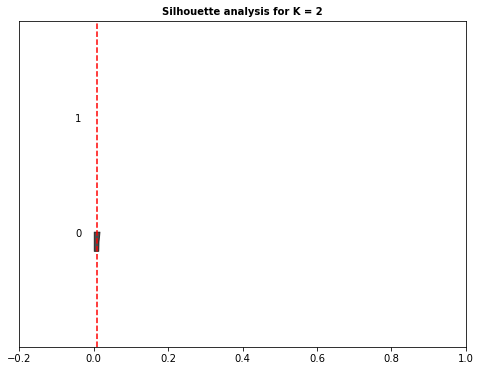

In [41]:
silhouette(kmeans_results, final_df, plot=True)

In [42]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

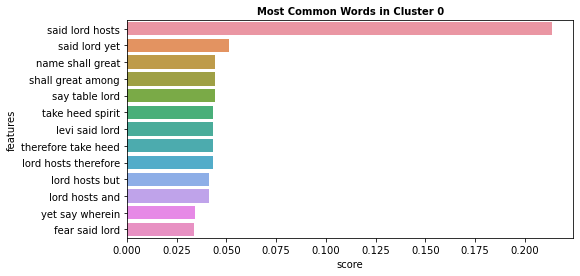

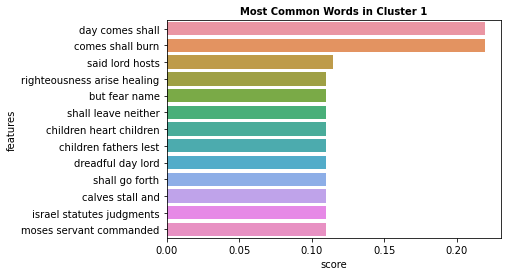

In [43]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [44]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

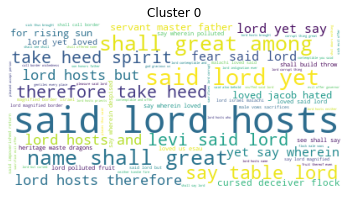

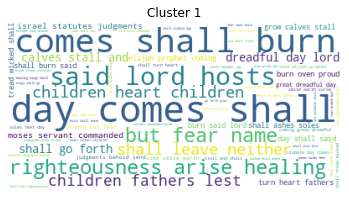

In [45]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [46]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Malaquias1,"'burden', 'word', 'lord', 'israel', 'malachi.i...",0
101,Malaquias_2,"',', 'priests', ',', 'commandment', 'you.if', ...",0
102,Malaquias_3,"'behold', ',', 'send', 'messenger', ',', 'shal...",0
103,Malaquias_4,"',', 'behold', ',', 'day', 'comes', ',', 'shal...",1


In [47]:
print(df)

           Autor                                              Livro  label
100   Malaquias1  'burden', 'word', 'lord', 'israel', 'malachi.i...      0
101  Malaquias_2  ',', 'priests', ',', 'commandment', 'you.if', ...      0
102  Malaquias_3  'behold', ',', 'send', 'messenger', ',', 'shal...      0
103  Malaquias_4  ',', 'behold', ',', 'day', 'comes', ',', 'shal...      1
